In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from  sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

1 Determine the number of subgroups from the dataset using attributes 3 to 205 i.e., exclude attributes 1, 
2 and 206. Is this number same as number of classes presented by attribute 206? Explain and justify 
your findings. 

In [ ]:
df=pd.read_csv('/content/SCADI.csv')


In [ ]:
print(df)

    Gender  Age  d 5100-0  d 5100-1  ...  d 571-4  d 571-8  d 571-9  Classes
0        0   18         0         0  ...        1        0        0   class6
1        0   22         0         0  ...        0        0        0   class6
2        0   18         0         0  ...        0        0        0   class6
3        1   18         0         0  ...        0        0        0   class6
4        0   19         0         0  ...        0        0        0   class6
..     ...  ...       ...       ...  ...      ...      ...      ...      ...
65       1   15         0         0  ...        0        0        0   class4
66       0    9         0         0  ...        0        0        0   class3
67       1    8         0         0  ...        0        0        0   class6
68       1    8         0         0  ...        0        0        0   class6
69       1   14         0         0  ...        0        0        0   class6

[70 rows x 206 columns]


In [ ]:
sub_df=df.iloc[:,3:205]


In [ ]:
wcss =[]
for i in range(1,10):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(sub_df)
  wcss.append(kmeans.inertia_)

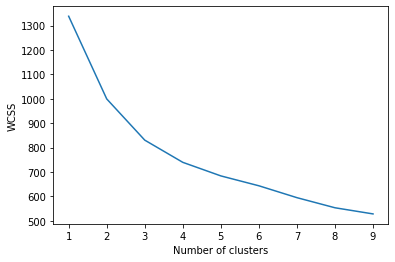

In [ ]:
plt.plot(range(1,10), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

1
-with the help of Kmean algorithm I draw the elbow curve and found that 3 cluster in the dataset

In [ ]:
 df.columns

Index(['Gender', 'Age', 'd 5100-0', 'd 5100-1', 'd 5100-2', 'd 5100-3',
       'd 5100-4', 'd 5100-8', 'd 5100-9', 'd 5101-0',
       ...
       'd 57022-8', 'd 57022-9', 'd 571-0', 'd 571-1', 'd 571-2', 'd 571-3',
       'd 571-4', 'd 571-8', 'd 571-9', 'Classes'],
      dtype='object', length=206)

#2. Is this data facing curse of dimensionality? If so, then how to solve this problem. Explain with a twodimensional plot and report relevant loss of informatio

In [ ]:
data_x=df.iloc[:,3:205]
target=df.iloc[:,205:206]
scale=StandardScaler()
data=scale.fit_transform(data_x.values)
data.shape

(70, 202)

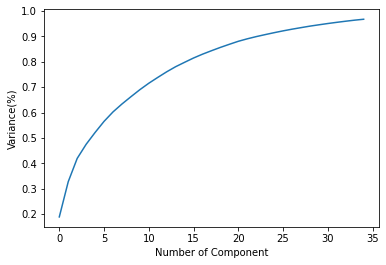

In [ ]:
pca=PCA(n_components=35)
X_pro=pca.fit_transform(data)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Component')
plt.ylabel('Variance(%)')
plt.show()

2
our aim to find the components which explain the maximum varinace .because we want to retain as much information as possible using these composnets so higher variance higher will be the information containded,as the graph shows that when the number of componets reaches to 35 the variace becomes 1


#After applying principal component analysis (PCA) on a given dataset, it was found that the percentage of variance for the first N components is X%. How is this percentage of variance computed?


In [ ]:
PCA1=PCA(n_components=2)
PCA1.fit(data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
print(PCA1.explained_variance_)

[26.72137161 19.55429634]


#first principal component  has the 26.72%
#second principal component has the 19.554

#Part4

In [ ]:
df_1=pd.read_csv('/content/obesity_levels.csv')


In [ ]:
print(df_1)

      Gender        Age  ...                 MTRANS           NObeyesdad
0     Female  21.000000  ...  Public_Transportation        Normal_Weight
1     Female  21.000000  ...  Public_Transportation        Normal_Weight
2       Male  23.000000  ...  Public_Transportation        Normal_Weight
3       Male  27.000000  ...                Walking   Overweight_Level_I
4       Male  22.000000  ...  Public_Transportation  Overweight_Level_II
...      ...        ...  ...                    ...                  ...
2106  Female  20.976842  ...  Public_Transportation     Obesity_Type_III
2107  Female  21.982942  ...  Public_Transportation     Obesity_Type_III
2108  Female  22.524036  ...  Public_Transportation     Obesity_Type_III
2109  Female  24.361936  ...  Public_Transportation     Obesity_Type_III
2110  Female  23.664709  ...  Public_Transportation     Obesity_Type_III

[2111 rows x 17 columns]


In [ ]:
print(df_1.columns)

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')


In [ ]:
df_1.corr()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
Age,1.000000,-0.025958,0.202560,0.016291,-0.043944,-0.045304,-0.144938,-0.296931
Height,-0.025958,1.000000,0.463136,-0.038121,0.243672,0.213376,0.294709,0.051912
Weight,0.202560,0.463136,1.000000,0.216125,0.107469,0.200575,-0.051436,-0.071561
FCVC,0.016291,-0.038121,0.216125,1.000000,0.042216,0.068461,0.019939,-0.101135
NCP,-0.043944,0.243672,0.107469,0.042216,1.000000,0.057088,0.129504,0.036326
CH2O,-0.045304,0.213376,0.200575,0.068461,0.057088,1.000000,0.167236,0.011965
FAF,-0.144938,0.294709,-0.051436,0.019939,0.129504,0.167236,1.000000,0.058562
TUE,-0.296931,0.051912,-0.071561,-0.101135,0.036326,0.011965,0.058562,1.000000


In [ ]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
df_2=df_1.iloc[:,0:16]
object_data=df_2[['Gender','family_history_with_overweight','FAVC','CAEC','SMOKE','SCC','CALC','MTRANS']]
le=LabelEncoder()
df_encoded=object_data.apply(le.fit_transform)

df2=df_2.drop(['Gender','family_history_with_overweight','FAVC','CAEC','SMOKE','SCC','CALC','MTRANS'],axis=1)
df_final=pd.concat([df_encoded,df2],axis=1)
print(df_final.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   int64  
 1   family_history_with_overweight  2111 non-null   int64  
 2   FAVC                            2111 non-null   int64  
 3   CAEC                            2111 non-null   int64  
 4   SMOKE                           2111 non-null   int64  
 5   SCC                             2111 non-null   int64  
 6   CALC                            2111 non-null   int64  
 7   MTRANS                          2111 non-null   int64  
 8   Age                             2111 non-null   float64
 9   Height                          2111 non-null   float64
 10  Weight                          2111 non-null   float64
 11  FCVC                            2111 non-null   float64
 12  NCP                             21

In [ ]:
LR=LinearRegression()
DT=DecisionTreeClassifier()

In [ ]:
X=df_final.drop('Weight',axis=1)
Y=df_final['Weight']
print(Y)


0        64.000000
1        56.000000
2        77.000000
3        87.000000
4        89.800000
           ...    
2106    131.408528
2107    133.742943
2108    133.689352
2109    133.346641
2110    133.472641
Name: Weight, Length: 2111, dtype: float64


In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=.3)

print(ytest)

1622     99.605527
774      77.929204
374      70.000000
2026    137.792990
659      42.000000
           ...    
57       65.000000
557      52.331172
760      62.337721
1674     99.709329
1999    133.644711
Name: Weight, Length: 634, dtype: float64


In [ ]:
LR.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
ypre=LR.predict(xtest)

In [ ]:
print(LR.score(xtest,ytest))

0.5726850264232363


a
I have use the Linear Regression model for this this problem because it the target variable is continous it is not categorical

b
-the target variable should be continous
-there should be correlation between the dependent and indepented varibale


c
-for the text varible I use the label encoder because model can not be train on the test data
d  
-yes I optimised the decision tree parameter,then it gives me more accuracy
e
-Get more training data.
-Increase the size or number of parameters in the model.
-Increase the complexity of the model.
-Increasing the training time, until cost function is minimised.


# Part 5


In [ ]:
data = pd.read_csv('obesity_levels.csv')
data

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


**Dropping Samples**

In [ ]:
todrop = data[ data['NObeyesdad'] == 'Insufficient_Weight' ].index
data.drop(todrop,inplace=True)
data

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [ ]:
data.NObeyesdad.unique()
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import copy
from sklearn import preprocessing
code = ['Gender','family_history_with_overweight','FAVC','CAEC','SMOKE','SCC','CALC','MTRANS']
le = preprocessing.LabelEncoder()
for i in range(0,len(code)):
  data[code[i]] = le.fit_transform(data[code[i]])
class1 = ['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II']
class2 = ['Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']
DT = DecisionTreeClassifier()
X = data.iloc[:,:16]
Y = data['NObeyesdad']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
mod = DT.fit(X_train,y_train)
predictions = mod.predict(X_test)
pred = copy.deepcopy(predictions)
for i in range(0,len(predictions)):
  if predictions[i] in class1:
    predictions[i] = 'class1'
  else:
    predictions[i] = 'class2'
X_test['predictions'] = predictions
X_test


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,predictions
927,1,19.971660,1.822573,85.084364,1,1,2.995599,3.095663,2,0,2.568157,0,2.724300,0.330457,2,3,class1
1512,1,19.850524,1.785062,104.187314,1,1,2.000000,3.000000,2,0,2.151570,0,1.605983,0.000000,3,3,class2
1046,1,23.320120,1.705813,82.011962,1,1,2.784471,2.122545,2,0,2.984153,0,2.164472,0.203978,2,3,class1
118,1,23.000000,1.620000,53.000000,1,1,2.000000,3.000000,2,0,2.000000,0,1.000000,1.000000,2,3,class1
900,0,21.000000,1.618148,68.981403,1,1,1.142468,3.000000,3,0,2.197732,0,0.827506,0.572877,2,3,class1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,0,22.000000,1.650000,65.000000,1,1,2.000000,3.000000,1,0,2.000000,1,1.000000,0.000000,3,0,class1
1873,0,23.761970,1.691350,114.480696,1,1,3.000000,3.000000,2,0,2.509535,0,0.334264,0.668172,2,3,class2
1771,1,25.666680,1.798580,117.933290,1,1,2.037042,3.000000,2,0,2.436990,0,1.016254,0.020044,2,3,class2
1680,1,30.976932,1.755333,118.237782,1,1,2.938616,3.000000,2,0,2.060390,0,0.371508,1.333559,2,0,class2


***5a***

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
accuracy_score(y_test,pred)
classification_report(y_test,pred)
confusion_matrix(y_test,pred)

# np.array(y_test)

array([[87,  0,  0,  0,  3,  0],
       [ 0, 91,  5,  0,  0,  7],
       [ 0,  0, 92,  0,  0,  0],
       [ 0,  0,  0, 91,  0,  0],
       [12,  0,  0,  0, 79,  2],
       [ 0,  6,  1,  0,  2, 74]])

Confusion matrix gives you a more complete picture of how your classifier is performing
Also allows you to compute various classification metrics, and these metrics can guide your model selection

***5b***

 No step has been taken to check the generisability of the

***5c***

Naive Bayes classifier can also be used as a model to predict the target variable however i have used decision tree classifier  because in decision tree classifier, the predictions are made on the basis of specific metrics i.e gini,entropy while in Naive Bayes predictions are made on the basis of probability calculations


# **Part 6**

***6a***

The list of features is:


1.   country
2.   season
3.   location
4.   bpy 
5.   visit(target variable)



***6b***

In [ ]:
import random
col = ['country','season','location','bpy','visit']
country = ['USA','Ireland','Brazil','Iceland','UK']
location = ['urban','rural']
season = ['winter','summer','autumn','spring']
visit = ['yes','no']
a,b,c,d,e = [],[],[],[],[]
for i in range(0,500):
  j = random.randint(0,len(country)-1)
  a.append(country[j])
  j = random.randint(0,len(season)-1)
  b.append(season[j])
  j = random.randint(0,len(location)-1)
  c.append(location[j])
  j = random.randint(0,500)
  d.append(j)
  j = random.randint(0,len(visit)-1)
  e.append(visit[j])

data1 = pd.DataFrame({'country':a,'season':b,'location':c,'bpy':d,'visit':e})
data1.to_csv('createddataset.csv')
data1

,country,season,location,bpy,visit
0,Ireland,winter,urban,15,yes
1,Iceland,spring,urban,48,yes
2,USA,winter,rural,19,no
3,Iceland,summer,rural,308,no
4,UK,summer,urban,31,yes
...,...,...,...,...,...
495,USA,autumn,urban,444,no
496,Brazil,summer,urban,45,yes
497,Iceland,winter,rural,389,yes
498,Brazil,autumn,urban,264,no


**dataset** **explaination**

country contains the list of resorts located in different places
season represents the time of the year in accordance with no. of bookings
location shows whether the resort is within the city premises or not
bpy - booking per year show the amount of bookings done for the resort each year
visit lets you know the preference of the majority people to visit the particular resort

***6c***

In [ ]:
code = ['country','season','location']
le = preprocessing.LabelEncoder()
for i in range(0,len(code)):
  data1[code[i]] = le.fit_transform(data1[code[i]])
X = data1.iloc[:,:4]
Y = data1['visit']
DT1 = DecisionTreeClassifier()
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
DT1 = DT1.fit(X_train,y_train)
predict = DT1.predict(X_test)
accuracy_score(y_test,predict)

0.4666666666666667

***6d***

This problem needs ml model in order to take decision whether to visit the visit a particular resort under specific seasons, and based on the bookings per(trust of the people in it)